
Training with SGD optimizer:

Training with Adam optimizer:


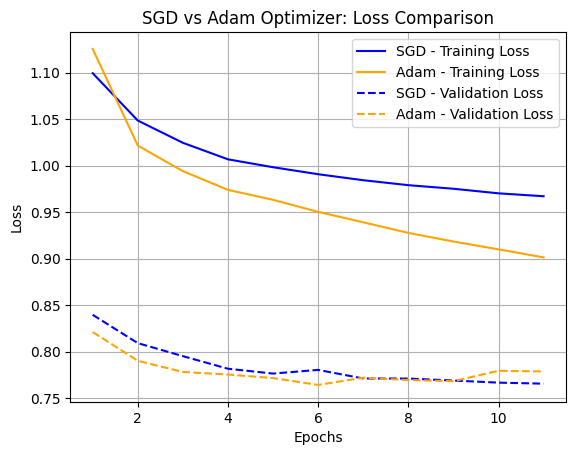

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt

# 1. Create synthetic data
def create_data():
    X = np.random.randn(1000, 10)  # 1000 samples, 10 features
    y = np.random.randn(1000, 1)   # 1000 samples, 1 target (regression task)
    return X, y

# 2. Define a simple deep neural network
def create_model():
    model = models.Sequential([
        layers.Dense(50, activation='relu', input_shape=(10,)),  # hidden layer with 10 features, 50 neurons
        layers.Dense(20, activation='relu'),  # hidden layer with 20 neurons
        layers.Dense(1)  # output layer (regression, single output)
    ])
    return model

# 3. Train model and capture loss values, showing the loss per epoch
def train_model_with_history(model, optimizer, X, y, batch_size, epochs, optimizer_name):
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

    # EarlyStopping and ModelCheckpoint callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    checkpoint = ModelCheckpoint(f'best_model_{optimizer_name}.keras', save_best_only=True, monitor='val_loss')

    # Training with callbacks and validation split
    history = model.fit(
        X, y, batch_size=batch_size, epochs=epochs, verbose=0,
        validation_split=0.2, callbacks=[early_stopping, checkpoint]
    )

    # Return training history for loss and loaded best model
    model.load_weights(f'best_model_{optimizer_name}.keras')  # Load best model after training
    return history.history['loss'], history.history['val_loss']

# 4. Compare performance of SGD and Adam
np.random.seed(42)  # Set random seed for reproducibility
X, y = create_data()
model_sgd = create_model()
model_adam = create_model()

# Optimizers
optimizer_sgd = optimizers.SGD(learning_rate=0.01)  # SGD optimizer
optimizer_adam = optimizers.Adam(learning_rate=0.001)  # Adam optimizer

# Set training parameters
epochs = 100  # Increase epochs for better trends
batch_size = 32


# 5. Plot the loss curves for comparison
# Train models and capture loss history for training and validation losses
print("\nTraining with SGD optimizer:")
sgd_loss, sgd_val_loss = train_model_with_history(model_sgd, optimizer_sgd, X, y, batch_size, epochs, 'SGD')

print("\nTraining with Adam optimizer:")
adam_loss, adam_val_loss = train_model_with_history(model_adam, optimizer_adam, X, y, batch_size, epochs, 'Adam')

# Determine the minimum number of epochs to plot based on early stopping
min_epochs = min(len(sgd_loss), len(adam_loss))

# Plot the loss curves for comparison
plt.plot(range(1, min_epochs + 1), sgd_loss[:min_epochs], label='SGD - Training Loss', color='blue')
plt.plot(range(1, min_epochs + 1), adam_loss[:min_epochs], label='Adam - Training Loss', color='orange')
plt.plot(range(1, min_epochs + 1), sgd_val_loss[:min_epochs], label='SGD - Validation Loss', color='blue', linestyle='--')
plt.plot(range(1, min_epochs + 1), adam_val_loss[:min_epochs], label='Adam - Validation Loss', color='orange', linestyle='--')

# Set labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGD vs Adam Optimizer: Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()


# Key Changes Made:
# Validation Split: Not explicitly added here, but consider using a validation set if your data allows for it.
# Callbacks: Added EarlyStopping and ModelCheckpoint.
# Epochs: Increased to 100 for more data on loss trends.
# Random Seed: Set for reproducibility`.